In [1]:
car_img_path="/content/car.jpeg"

In [2]:
car_img_path

'/content/car.jpeg'

######machine learing
######pandas
######numpy
######scikit learn
######seaborn/matplotlib

######deep- learning
######tensorflow
######pytorch
######keras

######opencv
######nltk
######gensim
######spacy

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2#opencv

In [7]:
img = cv2.imread(car_img_path)

In [8]:
img.shape

(168, 300, 3)

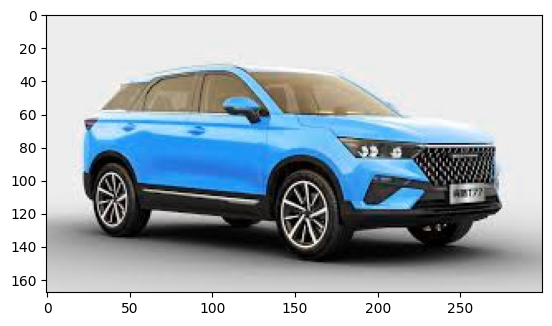

In [9]:
plt.imshow(img)

In [10]:
img2 = cv2.cvtColor(img,cv2. COLOR_BGR2RGB)

In [11]:
img2.shape

(168, 300, 3)

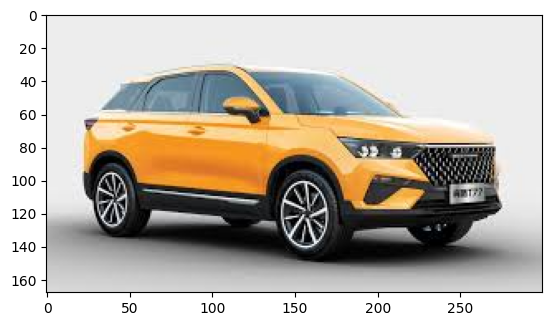

In [12]:
plt.imshow(img2)

In [13]:
img3 = cv2.cvtColor(img,cv2. COLOR_BGR2GRAY)

In [14]:
img3.shape

(168, 300)

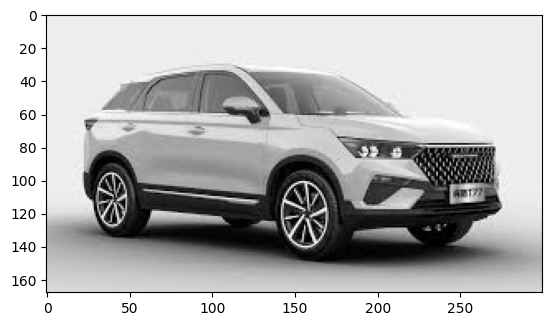

In [15]:
plt.imshow(img3,cmap='gray')

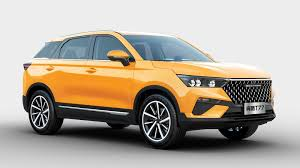

In [16]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [17]:
img3.shape

(168, 300)

In [18]:
row,col =img3.shape

In [19]:
car = img3.reshape(1,row,col,1)

In [20]:
car.shape

(1, 168, 300, 1)

In [21]:
Conv_layer = [tf.keras.layers.Conv2D(
    filters =1,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape = car.shape[1:]
)]

In [22]:
conv_model = tf.keras.Sequential(Conv_layer)

In [23]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# plt.imshow(car,cmap = "gray")

In [25]:
output = conv_model.predict(car)

1/1 [==============================] - 7s 7s/step


In [26]:
output.shape

(1, 166, 298, 1)

In [27]:
((168+0-3)//1)+1

166

In [28]:
row,col=output.shape[1:-1]

In [29]:
output.reshape(row,col)

array([[-30.50255 , -30.50255 , -30.50255 , ..., -30.50255 , -30.50255 ,
        -30.50255 ],
       [-30.50255 , -30.50255 , -30.50255 , ..., -30.50255 , -30.50255 ,
        -30.50255 ],
       [-30.50255 , -30.50255 , -30.50255 , ..., -30.50255 , -30.50255 ,
        -30.50255 ],
       ...,
       [-27.269522, -27.269522, -27.269522, ..., -26.29511 , -26.29511 ,
        -26.29511 ],
       [-27.167013, -27.167013, -27.167013, ..., -26.552525, -26.552525,
        -26.552525],
       [-27.597593, -27.597593, -27.597593, ..., -26.7809  , -26.7809  ,
        -26.7809  ]], dtype=float32)

In [30]:
reshaped_output=output.reshape(row,col)

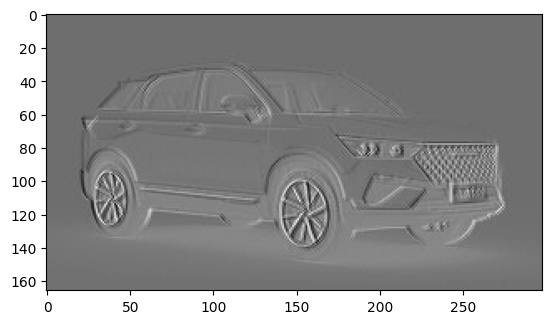

In [31]:
plt.imshow(reshaped_output,cmap="gray")

In [32]:
row,col,depth = img2.shape

In [33]:
color_car = img2

In [34]:
reshaped_color_img = color_car.reshape(1,row,col,depth)

In [35]:
reshaped_color_img.shape

(1, 168, 300, 3)

In [36]:
reshaped_color_img.shape[1:]

(168, 300, 3)

In [37]:
CONV_LAYER = [tf.keras.layers.Conv2D(
    filters = 1,
    kernel_size = (3,3),
    strides=(1,1),
    input_shape = reshaped_color_img.shape[1:]
)]

In [38]:
conv_model = tf.keras.Sequential(CONV_LAYER)

In [39]:
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
color_output = conv_model.predict(reshaped_color_img)

1/1 [==============================] - 0s 78ms/step


In [41]:
color_output.shape

(1, 166, 298, 1)

In [42]:
row,col = color_output.shape[1:-1]

In [43]:
reshaped_output = color_output.reshape(row,col)

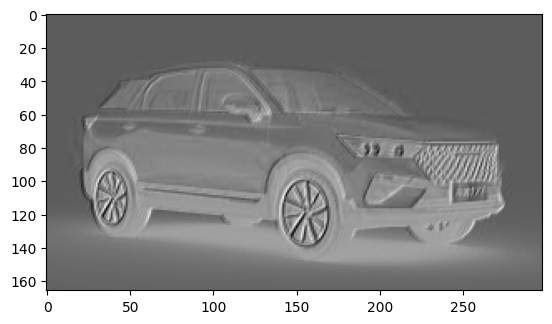

In [44]:
plt.imshow(reshaped_output,cmap = "gray")

In [45]:
color_car.shape

(168, 300, 3)

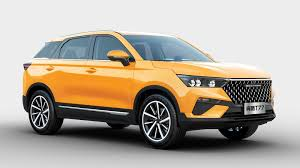

In [46]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [47]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

In [48]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img,grayscale=False)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides)
  result = pooling_layer(reshaped_img)
  return result

In [49]:
result=max_pooling(color_car)

In [50]:
result

<tf.Tensor: shape=(1, 84, 150, 3), dtype=uint8, numpy=
array([[[[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        [[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        [[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        ...,

        [[213, 213, 213],
         [213, 213, 213],
         [213, 213, 213],
         ...,
         [207, 207, 207],
         [207, 207, 207],
         [207, 207, 207]],

        [[216, 216, 216],
         [216, 216, 216],
         [216, 216, 216],
         ...,
         [211, 211, 211],
         [211, 211, 211],
         [211, 211, 211]],

        [[217, 217, 217],
         [217, 217, 217],
         [217, 217,

In [51]:
#tensor
result.shape

TensorShape([1, 84, 150, 3])

In [52]:
def plot(result):
  _,row,col,_=result.shape
  reshaped_img=tf.reshape(result,(row,col,3))
  plt.imshow(reshaped_img)

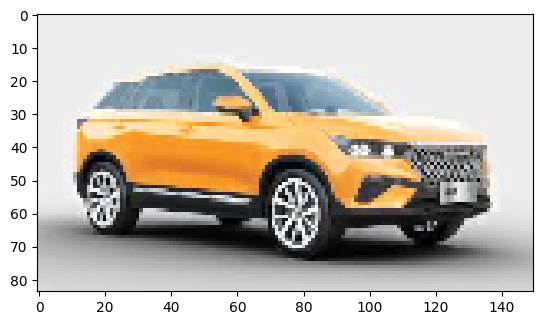

In [53]:
plot(result)

In [55]:
#min,avg,globalpolling

In [58]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

In [59]:
def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters,
                                      kernel_size=filter_size,
                                      strides=(1,1),
                                      input_shape=input_shape,
                                      padding=padding)]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [60]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    row, col, depth = out.shape[1:]
    reshape_out = out.reshape(row, col, depth)

    for d in range(depth):
      plt.imshow(reshape_out[:,:,d], cmap="gray")
      plt.show()

  except Exception as e:
    raise e

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 10)      280       
                                                                 
Total params: 280 (1.09 KB)
Trainable params: 280 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 68ms/step
(1, 166, 298, 10)


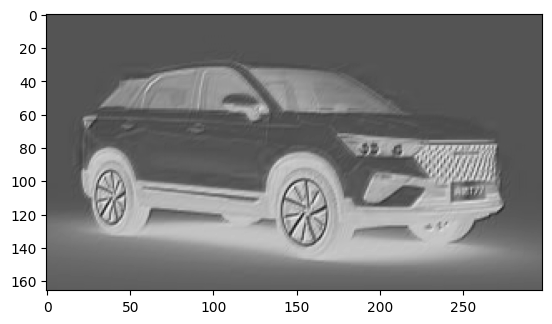

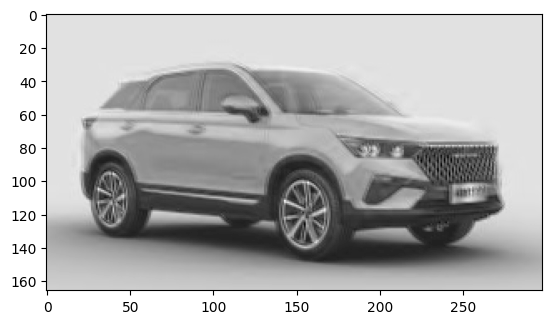

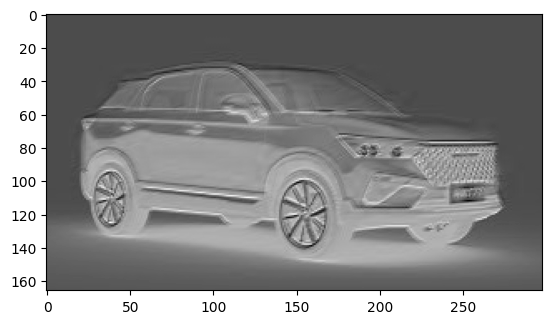

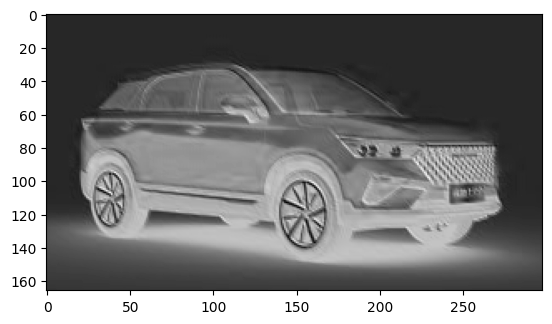

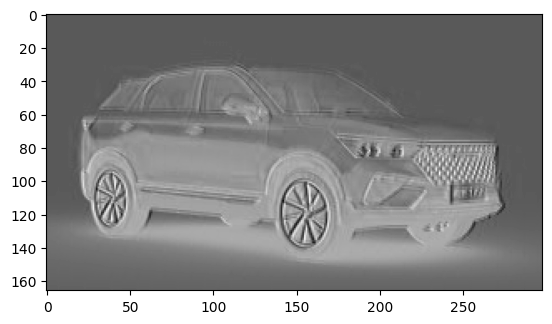

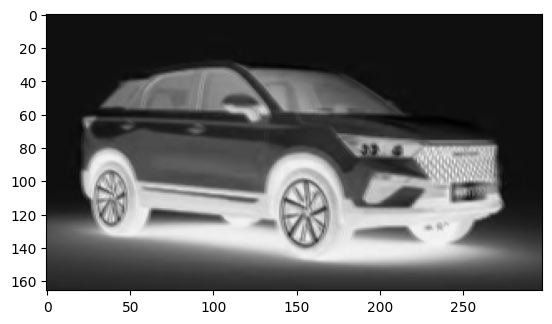

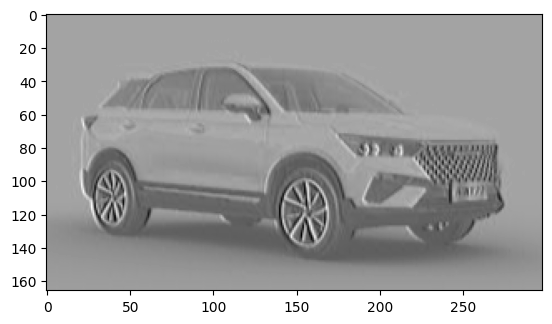

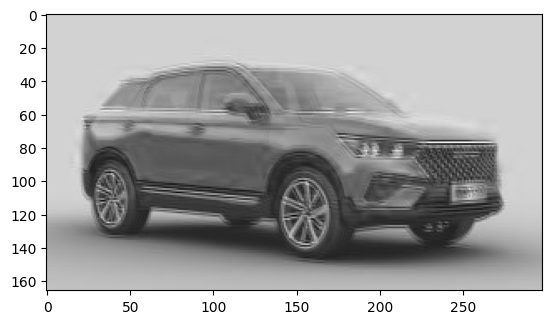

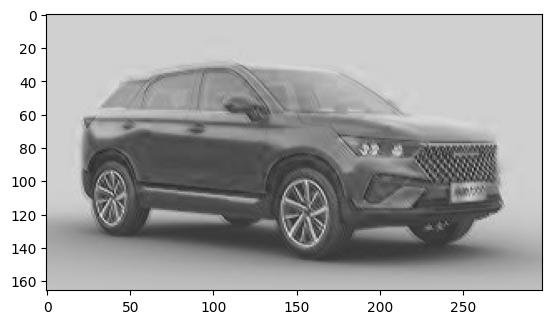

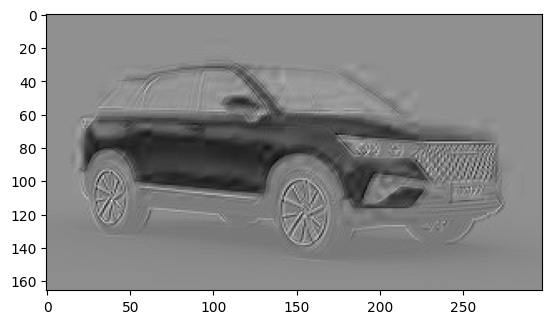

In [62]:
input_img = reshaping_in(color_car,grayscale=False)
model = get_conv_model(filters=10,filter_size=(3,3),strides=(1,1),input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img,model)